### Importing the necessary libraries

In [1]:
#import libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt
import urllib.request
import dlib


###  Downloading and visualising the image

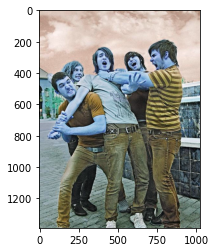

In [2]:
#download the any facial image and store at given path
imgPath = "/usercode/image.jpg"
imgURL = "https://i.ibb.co/XzCXpy8/0-Parade-Parade-0-194.jpg"
urllib.request.urlretrieve(imgURL, imgPath)
image = cv2.imread(imgPath)
plt.imshow(image)
plt.show()

### Loading the DNN network

In [3]:
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)


###  Prepare the image for the network

In [4]:

(h, w) = image.shape[:2]
tempImage = cv2.resize(image, (300, 300))
blob = cv2.dnn.blobFromImage(tempImage, 1.0, (300, 300), (104.0, 177.0, 123.0))

###  Running the network

In [5]:

net.setInput(blob)
detections = net.forward()

### Labelling and visualizing the image

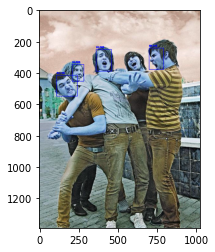

In [7]:
resnet_results = []
for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the prediction
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        resnet_results.append([startX, startY, endX, endY])
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

plt.imshow(image)
plt.show()

### Performance Test

In [8]:
import testResults
testResults.test(resnet_results)

precision: 1.00 | recall: 0.80 | f1-score 0.89
------------------------------------------------------------
false positive: 0 | false negative: 1 | true positive: 4


###  Converting the image to grayscale

In [9]:
image = cv2.imread(imgPath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


###  Running the detector using dlib

In [10]:
detector = dlib.get_frontal_face_detector()
faces = detector(gray, 1)

### Labelling the image and visualising the result

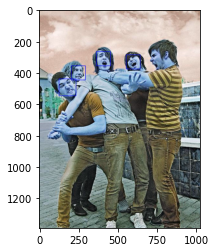

In [12]:
dlib_results = []
for result in faces:
    x = result.left()
    y = result.top()
    x1 = result.right()
    y1 = result.bottom()
    dlib_results.append([x, y, x1, y1])
    cv2.rectangle(image, (x, y), (x1, y1), (0, 0, 255), 2)
plt.imshow(image)
plt.show()

### Performance Test

In [13]:
import testResults
testResults.test(dlib_results)

precision: 0.75 | recall: 0.60 | f1-score 0.67
------------------------------------------------------------
false positive: 1 | false negative: 2 | true positive: 3
